## Introduction to Pandas

Python for Data Analysis, 2nd Edition
Data Wrangling with Pandas, NumPy, and IPython
By William McKinney
Publisher: O'Reilly Media
Release Date: October 2017
Pages: 522
http://proquest.safaribooksonline.com/book/programming/python/9781491957653/

https://pandas.pydata.org/pandas-docs/stable/dsintro.html


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import pandas_datareader.data as web
import matplotlib.pyplot as plt

### Split-Apply-Combine (GroupBy)

In the first stage of the process, data contained in a pandas object, whether a Series, DataFrame, or otherwise, is split into groups based on one or more keys that you provide. The splitting is performed on a particular axis of an object. For example, a DataFrame can be grouped on its rows (axis=0) or its columns (axis=1). Once this is done, a function is applied to each group, producing a new value. Finally, the results of all those function applications are combined into a result object. 

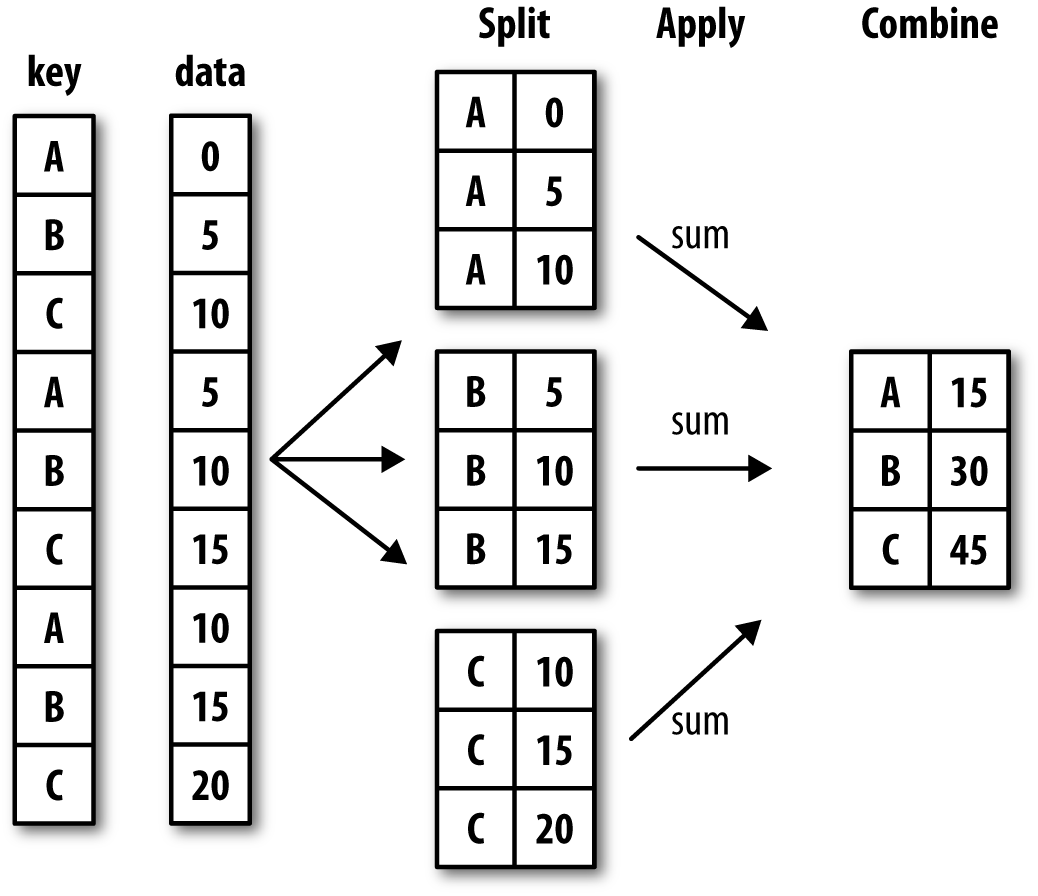

In [9]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : [11.0, 12.0, 13.0, 14.0, 15.0],
                   'data2' : [1.0, 1.2, 1.0, 1.5, 1.4]})
df

,key1,key2,data1,data2
0,a,one,11.0,1.0
1,a,two,12.0,1.2
2,b,one,13.0,1.0
3,b,two,14.0,1.5
4,a,one,15.0,1.4


In [10]:
grouped = df.groupby(['key1'])
list(grouped)[1]

('b',   key1 key2  data1  data2
 2    b  one   13.0    1.0
 3    b  two   14.0    1.5)

In [12]:
grouped.mean()

,data1,data2
key1,,
a,12.666667,1.20
b,13.500000,1.25


In [13]:
grouped = df.groupby(['key1','key2'])
list(grouped)[0]# all unique combinations get displayed.

(('a', 'one'),   key1 key2  data1  data2
 0    a  one   11.0    1.0
 4    a  one   15.0    1.4)

In [14]:
grouped.mean()

data1  data2
key1 key2              
a    one    13.0    1.2
     two    12.0    1.2
b    one    13.0    1.0
     two    14.0    1.5

In [15]:
lst = [1, 2, 3, 1, 2, 3]
s = pd.Series([1, 2, 3, 10, 20, 30], lst)
s

1     1
2     2
3     3
1    10
2    20
3    30
dtype: int64

In [16]:
grouped = s.groupby(level=0)


1    11
2    22
3    33
dtype: int64
1    1
2    2
3    3
dtype: int64
1    10
2    20
3    30
dtype: int64


In [17]:

print (grouped.first())
print (grouped.last())

1    1
2    2
3    3
dtype: int64
1    10
2    20
3    30
dtype: int64


Exercise 8: Create a dataframe with hierarchical indexing as follows:

Define an arrays object: <br>
arrays = [['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'], 
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]

Create index using MultiIndex<br>          
index = pd.MultiIndex.from_arrays(arrays, names=['first', 'second'])

Create data frame:<br>
s = pd.Series(np.random.randn(8), index=index)

Perform group by at level 0 and do the sum operation. Repeat the same for level 1.

In [23]:
# Partial Solution
arrays = [['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'], ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]
#Create index using MultiIndex
index = pd.MultiIndex.from_arrays(arrays, names=['first', 'second'])
#Create data frame:
s = pd.Series(np.random.randn(8), index=index)
s
grouped = s.groupby(level=0)
list(grouped)[0]
print(grouped.sum())

first
bar   -0.527119
baz   -1.350281
foo    1.146049
qux   -1.763792
dtype: float64


In [25]:
grouped = s.groupby(level=1)
list(grouped)[1]
print(grouped.sum())
print(grouped.mean())

second
one   -0.493134
two   -2.002009
dtype: float64
second
one   -0.123284
two   -0.500502
dtype: float64


### Pandas Groupby Tutorial
Ref: https://www.datacamp.com/community/tutorials/pandas-split-apply-combine-groupby
Tutorial used here is copyrighted <br>
Copyright (c) 2017 DataCamp <br>
Licensed under <a href="mit-license.txt">MIT License</a>

### Working with Time Series
Resampling
Windows - rolling expansion


### Resampling and Frequency Conversion
Resampling refers to the process of converting a time series from one frequency to another. Aggregating higher frequency data to lower frequency is called downsampling, while converting lower frequency to higher frequency is called upsampling. 

In [26]:
start = datetime(2016, 10, 17)
end = datetime(2017, 10, 27)
all_data = {ticker: web.DataReader(ticker,'yahoo',start, end)
            for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}
price = pd.DataFrame({ticker: data['Adj Close']
                     for ticker, data in all_data.items()})
price.head()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2016-10-17,112.911964,139.635162,54.416248,779.960022
2016-10-18,112.835114,135.981201,54.834690,795.260010
2016-10-19,112.498932,136.468414,54.711056,801.500000
2016-10-20,112.441284,136.702988,54.444786,796.969971
2016-10-21,111.999451,134.997772,56.736691,799.369995


In [27]:
price[:30]

,AAPL,IBM,MSFT,GOOG
Date,,,,
2016-10-17,112.911964,139.635162,54.416248,779.960022
2016-10-18,112.835114,135.981201,54.834690,795.260010
2016-10-19,112.498932,136.468414,54.711056,801.500000
2016-10-20,112.441284,136.702988,54.444786,796.969971
2016-10-21,111.999451,134.997772,56.736691,799.369995
2016-10-24,113.008018,135.845886,58.011032,813.109985
2016-10-25,113.584343,136.125580,58.001530,807.669983
2016-10-26,111.029289,136.964630,57.659161,799.070007
2016-10-27,109.963097,138.354034,57.155128,795.349976


In [28]:
monthly_price = price.resample('M').first()
print (monthly_price)

                  AAPL         IBM       MSFT        GOOG
Date                                                     
2016-10-31  112.911964  139.635162  54.416248  779.960022
2016-11-30  107.091064  137.848770  56.869835  783.609985
2016-12-31  105.709946  145.499451  56.679558  747.919983
2017-01-31  112.140007  152.209076  59.915661  786.140015
2017-02-28  124.305000  158.672852  60.873089  795.695007
2017-03-31  135.548996  166.956284  62.552128  835.239990
2017-04-30  139.340393  160.120178  63.139694  838.549988
2017-05-31  142.132996  145.750641  66.857765  912.570007
2017-06-30  149.145844  141.457596  67.909416  966.950012
2017-07-31  139.720795  144.153870  66.039726  898.700012
2017-08-31  146.098297  134.628876  70.311943  930.830017
2017-09-30  160.356842  134.908951  72.011063  937.340027
2017-10-31  150.347382  137.324753  72.663582  953.270020


In [29]:
monthly_price = price.resample('M').last()
print (monthly_price)

                  AAPL         IBM       MSFT         GOOG
Date                                                      
2016-10-31  109.060188  138.660767  56.983955   784.539978
2016-11-30  106.704384  147.684387  57.694431   758.039978
2016-12-31  111.821404  151.116608  59.494389   771.820007
2017-01-31  117.160492  158.882263  61.897533   796.789978
2017-02-28  132.833969  165.001785  61.627422   823.210022
2017-03-31  139.301605  159.789825  63.438282   829.559998
2017-04-30  139.291885  147.081146  65.942688   905.960022
2017-05-31  148.736908  141.420563  67.657547   964.859985
2017-06-30  140.227097  142.532410  66.775978   908.729980
2017-07-31  144.813034  134.045135  70.428162   930.500000
2017-08-31  160.307968  133.925797  72.819397   939.330017
2017-09-30  150.650375  135.845322  72.546715   959.109985
2017-10-31  159.379364  143.897888  81.623573  1019.270020


In [30]:
# group data and find mean
monthly_price = price.resample('M').mean()
print (monthly_price)

                  AAPL         IBM       MSFT        GOOG
Date                                                     
2016-10-31  111.687705  137.038440  56.353698  797.106357
2016-11-30  106.298907  144.234416  57.192187  766.640953
2016-12-31  110.388362  150.650979  59.473421  782.171422
2017-01-31  115.441937  155.424574  60.501604  807.904752
2017-02-28  129.485657  163.769993  61.580953  816.916581
2017-03-31  136.351721  162.053114  62.457053  834.111307
2017-04-30  138.551898  153.372965  63.738416  844.056840
2017-05-31  148.000917  141.786142  66.573383  939.284085
2017-06-30  143.938085  142.558099  68.314534  953.766824
2017-07-31  144.393893  139.149548  69.760217  942.865009
2017-08-31  155.258643  133.205928  70.754653  922.023045
2017-09-30  154.060355  135.643996  72.405003  931.299503
2017-10-31  153.280804  141.521447  75.361314  979.087003


In [31]:
def custom_function(temp):
    """ first value of the period """
    return temp[0]
print (price.resample('M').apply(custom_function))


                  AAPL         IBM       MSFT        GOOG
Date                                                     
2016-10-31  112.911964  139.635162  54.416248  779.960022
2016-11-30  107.091064  137.848770  56.869835  783.609985
2016-12-31  105.709946  145.499451  56.679558  747.919983
2017-01-31  112.140007  152.209076  59.915661  786.140015
2017-02-28  124.305000  158.672852  60.873089  795.695007
2017-03-31  135.548996  166.956284  62.552128  835.239990
2017-04-30  139.340393  160.120178  63.139694  838.549988
2017-05-31  142.132996  145.750641  66.857765  912.570007
2017-06-30  149.145844  141.457596  67.909416  966.950012
2017-07-31  139.720795  144.153870  66.039726  898.700012
2017-08-31  146.098297  134.628876  70.311943  930.830017
2017-09-30  160.356842  134.908951  72.011063  937.340027
2017-10-31  150.347382  137.324753  72.663582  953.270020


In [32]:
returns = monthly_price.pct_change()
returns

,AAPL,IBM,MSFT,GOOG
Date,,,,
2016-10-31,NaN,NaN,NaN,NaN
2016-11-30,-0.048249,0.052511,0.014879,-0.038220
2016-12-31,0.038471,0.044487,0.039887,0.020258
2017-01-31,0.045780,0.031686,0.017288,0.032900
2017-02-28,0.121652,0.053694,0.017840,0.011155
2017-03-31,0.053026,-0.010483,0.014227,0.021048
2017-04-30,0.016136,-0.053564,0.020516,0.011924
2017-05-31,0.068198,-0.075547,0.044478,0.112821
2017-06-30,-0.027451,0.005445,0.026154,0.015419


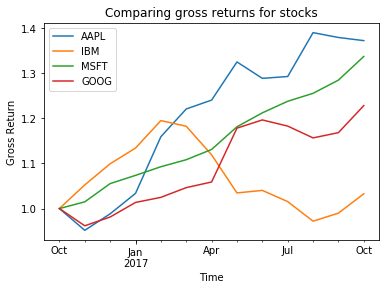

In [33]:
rgross = returns + 1.0
_ = rgross.fillna(1.0, inplace=True)  # assume the return on the first day was zero
prs = rgross.cumprod()
prs.plot()
plt.title('Comparing gross returns for stocks')
plt.xlabel('Time')
plt.ylabel('Gross Return')
plt.legend();
plt.show()

Exercise 9. Downsample weekly and plot gross returns for AAPL.

In [37]:
start = datetime(2016, 10, 17)
end = datetime(2017, 10, 27)
all_data = {ticker: web.DataReader(ticker,'yahoo',start, end)
            for ticker in ['AAPL']}
price = pd.DataFrame({ticker: data['Adj Close']
                     for ticker, data in all_data.items()})
price.head()
monthly_price = price.resample('W').first()
monthly_price



,AAPL
Date,
2016-10-23,NaN
2016-10-30,0.000851
2016-11-06,-0.034934
2016-11-13,-0.022575
2016-11-20,-0.042568
2016-11-27,0.056948
2016-12-04,-0.001432
2016-12-11,-0.022049
2016-12-18,0.038402


In [38]:
returns = monthly_price.pct_change()
returns

,AAPL
Date,
2016-10-23,NaN
2016-10-30,0.000851
2016-11-06,-0.034934
2016-11-13,-0.022575
2016-11-20,-0.042568
2016-11-27,0.056948
2016-12-04,-0.001432
2016-12-11,-0.022049
2016-12-18,0.038402


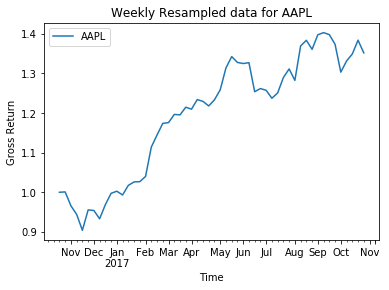

In [40]:
rgross = returns + 1.0
_ = rgross.fillna(1.0, inplace=True)  # assume the return on the first day was zero
prs = rgross.cumprod()
prs.plot()
plt.title('Weekly Resampled data for AAPL')
plt.xlabel('Time')
plt.ylabel('Gross Return')
plt.legend();
plt.show()

### Moving Window Functions
For working with data, a number of windows functions are provided for computing common window or rolling statistics. Among these are count, sum, mean, median, correlation, variance, covariance, standard deviation, skewness, and kurtosis.

In [41]:
# rolling on time series 
pd.Series.rolling?

In [42]:
s = pd.Series(np.arange(100), index=pd.date_range('1/1/2000', periods=100))
r = s.rolling(window=10)
s.head()

2000-01-01    0
2000-01-02    1
2000-01-03    2
2000-01-04    3
2000-01-05    4
Freq: D, dtype: int32

In [43]:
print(r)

Rolling [window=10,center=False,axis=0]


In [44]:
print (r.mean())

2000-01-01     NaN
2000-01-02     NaN
2000-01-03     NaN
2000-01-04     NaN
2000-01-05     NaN
2000-01-06     NaN
2000-01-07     NaN
2000-01-08     NaN
2000-01-09     NaN
2000-01-10     4.5
2000-01-11     5.5
2000-01-12     6.5
2000-01-13     7.5
2000-01-14     8.5
2000-01-15     9.5
2000-01-16    10.5
2000-01-17    11.5
2000-01-18    12.5
2000-01-19    13.5
2000-01-20    14.5
2000-01-21    15.5
2000-01-22    16.5
2000-01-23    17.5
2000-01-24    18.5
2000-01-25    19.5
2000-01-26    20.5
2000-01-27    21.5
2000-01-28    22.5
2000-01-29    23.5
2000-01-30    24.5
              ... 
2000-03-11    65.5
2000-03-12    66.5
2000-03-13    67.5
2000-03-14    68.5
2000-03-15    69.5
2000-03-16    70.5
2000-03-17    71.5
2000-03-18    72.5
2000-03-19    73.5
2000-03-20    74.5
2000-03-21    75.5
2000-03-22    76.5
2000-03-23    77.5
2000-03-24    78.5
2000-03-25    79.5
2000-03-26    80.5
2000-03-27    81.5
2000-03-28    82.5
2000-03-29    83.5
2000-03-30    84.5
2000-03-31    85.5
2000-04-01  

In [45]:
# first non-zero entry
arr1 = s[0:10]
print (np.mean(arr1))

4.5


In [46]:
# second non-zero entry
arr2= s[1:11]
print (np.mean(arr2))

5.5


In [48]:
# rolling on data frame
df = pd.DataFrame({'B': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]})
df
df.rolling(5).mean()
df.rolling(5, min_periods=2).mean()

,B
0,NaN
1,0.5
2,1.0
3,1.5
4,2.0
5,3.0
6,4.0
7,5.0
8,6.0
9,7.0


In [49]:
pwd()

'C:\\Users\\Mahesh\\Downloads'

### Resampling and rolling for financial data

In [50]:
close_px_all = pd.read_csv('resources/stock_px_2.csv',
                           parse_dates=True, index_col=0)
print(close_px_all.head())

            AAPL   MSFT    XOM     SPX
2003-01-02  7.40  21.11  29.22  909.03
2003-01-03  7.45  21.14  29.24  908.59
2003-01-06  7.45  21.52  29.96  929.01
2003-01-07  7.43  21.93  28.95  922.93
2003-01-08  7.28  21.31  28.83  909.93


In [51]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
print (close_px)

              AAPL   MSFT    XOM
2003-01-02    7.40  21.11  29.22
2003-01-03    7.45  21.14  29.24
2003-01-06    7.45  21.52  29.96
2003-01-07    7.43  21.93  28.95
2003-01-08    7.28  21.31  28.83
2003-01-09    7.34  21.93  29.44
2003-01-10    7.36  21.97  29.03
2003-01-13    7.32  22.16  28.91
2003-01-14    7.30  22.39  29.17
2003-01-15    7.22  22.11  28.77
2003-01-16    7.31  21.75  28.90
2003-01-17    7.05  20.22  28.60
2003-01-21    7.01  20.17  27.94
2003-01-22    6.94  20.04  27.58
2003-01-23    7.09  20.54  27.52
2003-01-24    6.90  19.59  26.93
2003-01-27    7.07  19.32  26.21
2003-01-28    7.29  19.18  26.90
2003-01-29    7.47  19.61  27.88
2003-01-30    7.16  18.95  27.37
2003-01-31    7.18  18.65  28.13
2003-02-03    7.33  19.08  28.52
2003-02-04    7.30  18.59  28.52
2003-02-05    7.22  18.45  28.11
2003-02-06    7.22  18.63  27.87
2003-02-07    7.07  18.30  27.66
2003-02-10    7.18  18.62  27.87
2003-02-11    7.18  18.25  27.67
2003-02-12    7.20  18.25  27.12
2003-02-13

In [52]:
# sample business day, if missing values fill forward (fill with the last know value)
close_px = close_px.resample('B').ffill()
close_px.head()

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83


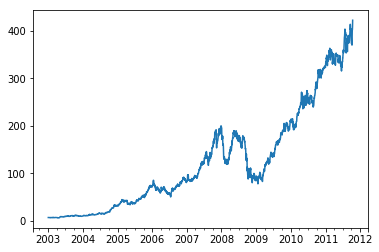

In [53]:
close_px.AAPL.plot()
plt.show()

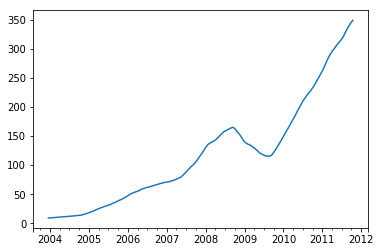

In [56]:
close_px.AAPL.rolling(250).mean().plot()
#close_px.AAPL.rolling(250, min_periods=25).mean().plot()
plt.show()

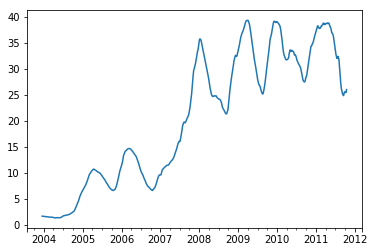

In [57]:
appl_std250 = close_px.AAPL.rolling(250).std()
appl_std250.plot()
plt.show()

Exercise 10: Plot the rolling mean of three stocks in one plot for  close_px. First plot them using a rolling window of size 25 and then for size 250 and observe the difference. Repeat this exercise for standard deviation.

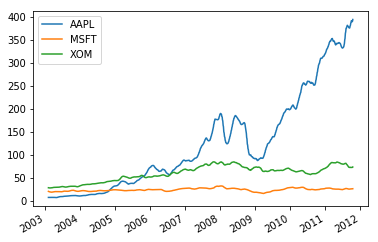

In [61]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px.rolling(25).mean().plot()
plt.show()

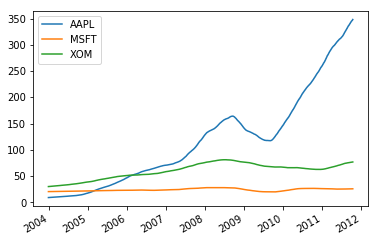

In [62]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px.rolling(250).mean().plot()
plt.show()

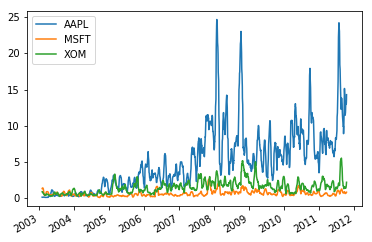

In [63]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px.rolling(25).std().plot()
plt.show()

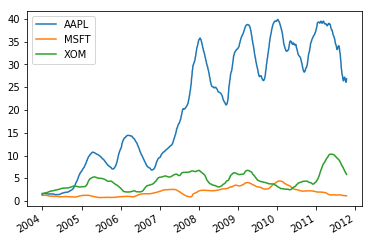

In [65]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px.rolling(250).std().plot()
plt.show()

### Binary Moving Window Functions
Some statistical operators, like correlation and covariance, need to operate on two time series. As an example, financial analysts are often interested in a stock’s correlation to a benchmark index like the S&P 500. 

2003-01-02         NaN
2003-01-03   -0.000484
2003-01-06    0.022474
2003-01-07   -0.006545
2003-01-08   -0.014086
Name: SPX, dtype: float64
                AAPL      MSFT       XOM
2003-01-02       NaN       NaN       NaN
2003-01-03  0.006757  0.001421  0.000684
2003-01-06  0.000000  0.017975  0.024624
2003-01-07 -0.002685  0.019052 -0.033712
2003-01-08 -0.020188 -0.028272 -0.004145


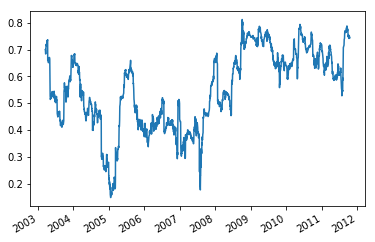

In [66]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
print(spx_rets.head())
returns = close_px.pct_change()
print(returns.head())
corr = returns.AAPL.rolling(100, min_periods=50).corr(spx_rets)
corr.plot()
plt.show()

### Correlation with multiple stocks
Suppose you wanted to compute the correlation of the S&P 500 index with many stocks at once. Writing a loop and creating a new DataFrame would be easy but might get repetitive, so if you pass a Series and a DataFrame, a function like rolling_corr will compute the correlation of the Series (spx_rets, in this case) with each column in the DataFrame

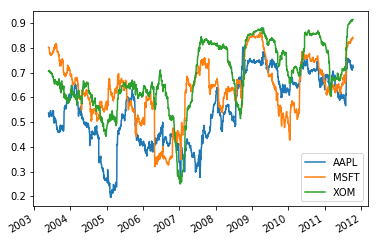

In [67]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()
plt.show()

### Expanding Windows
A common alternative to rolling statistics is to use an expanding window, which yields the value of the statistic with all the data available up to that point in time.

These follow a similar interface to .rolling, with the .expanding method returning an Expanding object.


In [68]:
df = pd.DataFrame({'B': [0, 1, 2, 3, 4, 5, np.nan, 7, 8, 9]})

In [ ]:
df.expanding?

In [69]:
df.expanding(3).sum()

,B
0,NaN
1,NaN
2,3.0
3,6.0
4,10.0
5,15.0
6,15.0
7,22.0
8,30.0
9,39.0


In [71]:
# create test data, cusum and sum in expanding window
s = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
sc = s.cumsum()

In [72]:
print (sc[:10])

2000-01-01    0.952283
2000-01-02    1.830140
2000-01-03    1.792705
2000-01-04    2.106475
2000-01-05    3.221806
2000-01-06    3.242163
2000-01-07    3.015585
2000-01-08    2.389660
2000-01-09    0.895025
2000-01-10    0.831194
Freq: D, dtype: float64


In [73]:
s.expanding(min_periods=1).sum().head()

2000-01-01    0.952283
2000-01-02    1.830140
2000-01-03    1.792705
2000-01-04    2.106475
2000-01-05    3.221806
Freq: D, dtype: float64

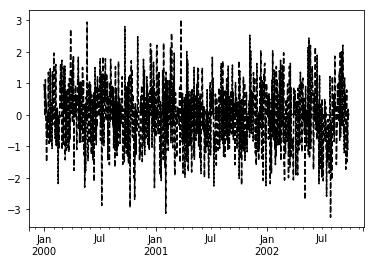

In [74]:
s.plot(style='k--')
s.expanding().mean().plot(style='k')
plt.show()

### Exponentially Weighted Windows
Reference: https://pandas.pydata.org/pandas-docs/stable/computation.html#exponentially-weighted-windows

A related set of functions are exponentially weighted versions of several of the above statistics. A similar interface to .rolling and .expanding is accessed through the .ewm method to receive an EWM object. 

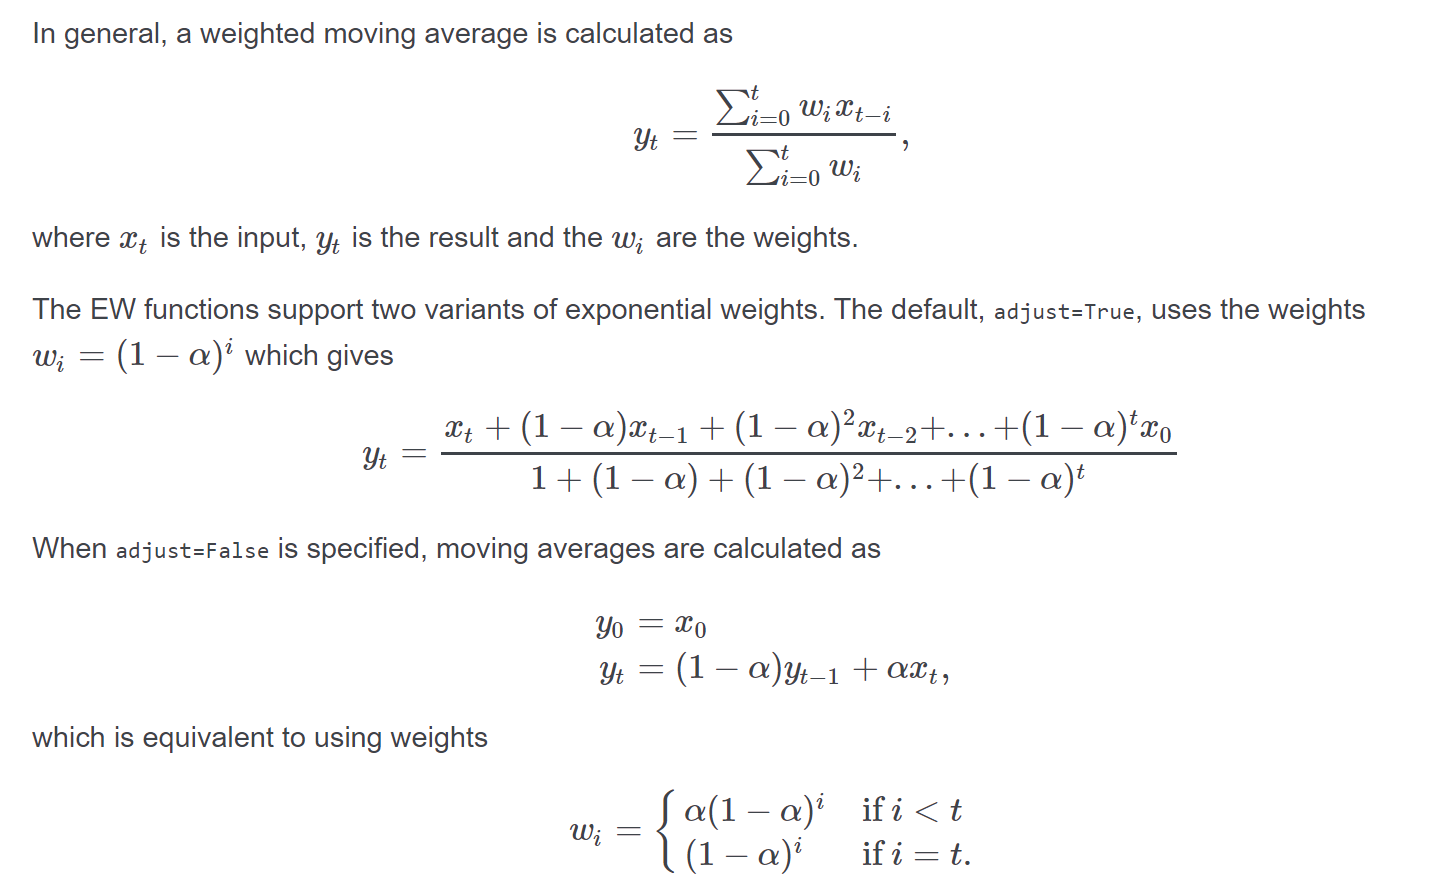

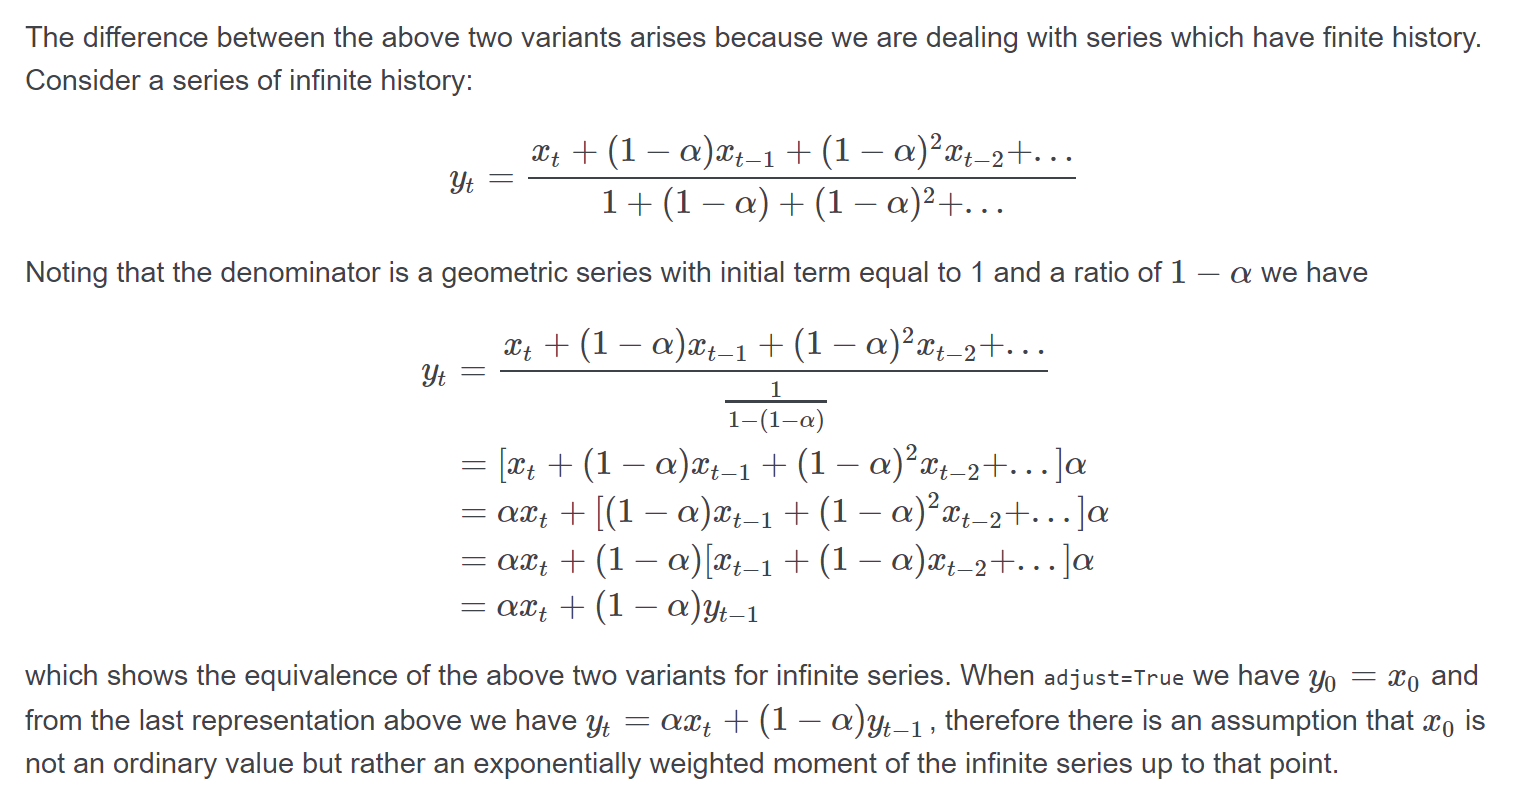

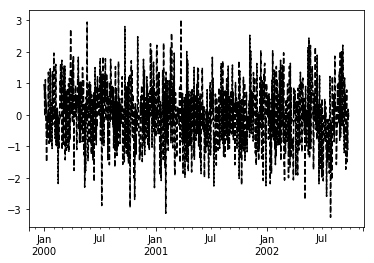

In [75]:
s.plot(style='k--')
s.ewm(span=100).mean().plot(style='k') #20-day Exponentially Weighted moving average
plt.show()

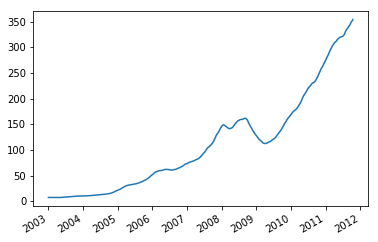

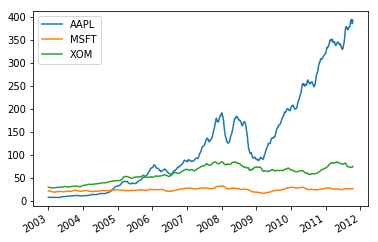

In [77]:
close_px.AAPL.ewm(span=200).mean().plot()
close_px.ewm(span=20).mean().plot()
plt.show()

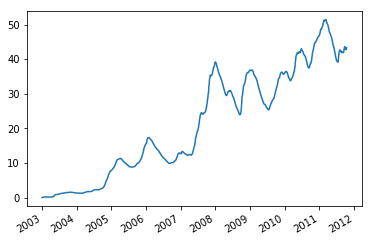

In [78]:
close_px.AAPL.ewm(span=200).std().plot()
#close_px.ewm(span=20).mean().plot()
plt.show()

For computing annual historic volatility(std) of a stock, use the following computaiton:

$\mbox{Volatility per Annum}  =  \mbox{Volatility per Trading Day}   \times \sqrt{\mbox{Number of Trading Days per Annum}} $

A typical way of computing daily volatility is to take daily logarithmic returns of the closing data for a stock for $252$ days (number of trading days per annum).






In [79]:
## Computing Volatility


# Pull sp500 data from Yahoo finance 
sp500 = web.DataReader('^GSPC',data_source='yahoo',start='1/1/2010', end='1/1/2016')

In [80]:
sp500.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,1133.869995,1116.560059,1116.560059,1132.989990,3991400000,1132.989990
2010-01-05,1136.630005,1129.660034,1132.660034,1136.520020,2491020000,1136.520020
2010-01-06,1139.189941,1133.949951,1135.709961,1137.140015,4972660000,1137.140015
2010-01-07,1142.459961,1131.319946,1136.270020,1141.689941,5270680000,1141.689941
2010-01-08,1145.390015,1136.219971,1140.520020,1144.979980,4389590000,1144.979980


In [ ]:
print(sp500['Close'].head())
sp500['Close'].shift(1).head()

In [81]:
# Compute the logarithmic returns using the Closing price 
sp500['Log_Ret'] = np.log(sp500['Close'] / sp500['Close'].shift(1))
sp500.head()

,High,Low,Open,Close,Volume,Adj Close,Log_Ret
Date,,,,,,,
2010-01-04,1133.869995,1116.560059,1116.560059,1132.989990,3991400000,1132.989990,NaN
2010-01-05,1136.630005,1129.660034,1132.660034,1136.520020,2491020000,1136.520020,0.003111
2010-01-06,1139.189941,1133.949951,1135.709961,1137.140015,4972660000,1137.140015,0.000545
2010-01-07,1142.459961,1131.319946,1136.270020,1141.689941,5270680000,1141.689941,0.003993
2010-01-08,1145.390015,1136.219971,1140.520020,1144.979980,4389590000,1144.979980,0.002878


In [ ]:
sp500std = sp500['Log_Ret'].rolling(252).std() * np.sqrt(252)
sp500std.tail(5)

In [84]:
sp500['Volatility'] =  sp500['Log_Ret'].rolling(252).std() * np.sqrt(252)
sp500.tail(5)

,High,Low,Open,Close,Volume,Adj Close,Log_Ret,Volatility
Date,,,,,,,,
2015-12-24,2067.360107,2058.729980,2063.520020,2060.989990,1411860000,2060.989990,-0.001600,0.154718
2015-12-28,2057.770020,2044.199951,2057.770020,2056.500000,2492510000,2056.500000,-0.002181,0.154696
2015-12-29,2081.560059,2060.540039,2060.540039,2078.360107,2542000000,2078.360107,0.010574,0.155058
2015-12-30,2077.340088,2061.969971,2077.340088,2063.360107,2367430000,2063.360107,-0.007243,0.155150
2015-12-31,2062.540039,2043.619995,2060.590088,2043.939941,2655330000,2043.939941,-0.009456,0.155092


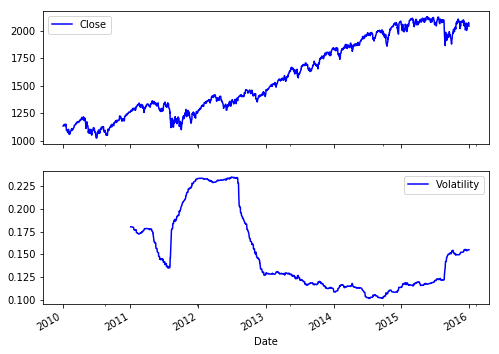

In [83]:
# Plot the sp500 Price series and the Volatility
sp500[['Close', 'Volatility']].plot(subplots=True, color='blue',figsize=(8, 6))
plt.show()

Exercise 11:  Repeat the above plots by replacing logarithmic returns by regular returns. Do you notice any difference?

In [89]:
sp500['returns'] = (sp500['Close'] / sp500['Close'].shift(1))
sp500.head()

,High,Low,Open,Close,Volume,Adj Close,Log_Ret,Volatility,returns
Date,,,,,,,,,
2010-01-04,1133.869995,1116.560059,1116.560059,1132.989990,3991400000,1132.989990,NaN,NaN,NaN
2010-01-05,1136.630005,1129.660034,1132.660034,1136.520020,2491020000,1136.520020,0.003111,NaN,1.003116
2010-01-06,1139.189941,1133.949951,1135.709961,1137.140015,4972660000,1137.140015,0.000545,NaN,1.000546
2010-01-07,1142.459961,1131.319946,1136.270020,1141.689941,5270680000,1141.689941,0.003993,NaN,1.004001
2010-01-08,1145.390015,1136.219971,1140.520020,1144.979980,4389590000,1144.979980,0.002878,NaN,1.002882


In [86]:
sp500std = sp500['returns'].rolling(252).std() * np.sqrt(252)
sp500std.tail(5)

Date
2015-12-24    0.154560
2015-12-28    0.154539
2015-12-29    0.154903
2015-12-30    0.154995
2015-12-31    0.154937
Name: returns, dtype: float64

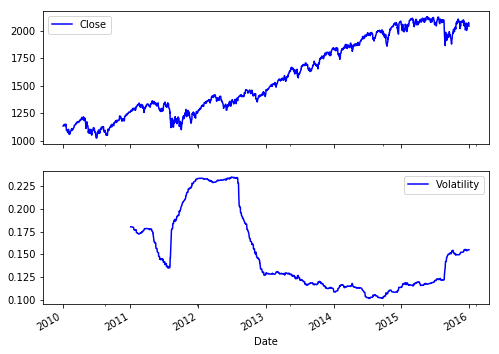

In [87]:
sp500[['Close', 'Volatility']].plot(subplots=True, color='blue',figsize=(8, 6))
plt.show()